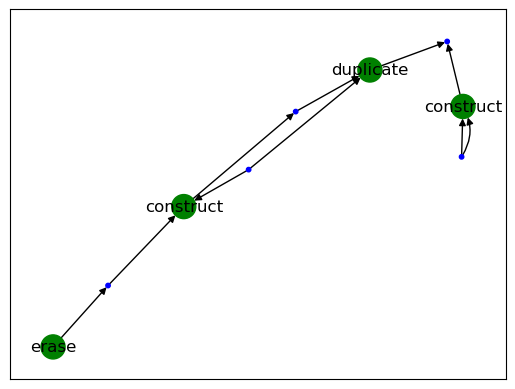

In [1]:
from src import nx_hif
from src.nx_hif.test_dpo import *
import networkx as nx

def inet_draw(inet):
    inet = nx.MultiDiGraph(inet)
    inet.remove_nodes_from(list(nx.isolates(inet)))
    # https://docs.rapids.ai/api/cugraph/stable/api_docs/api/cugraph/cugraph.force_atlas2/
    # note that this layout can be run on the GPU with nx-cugraph
    pos = nx.drawing.layout.forceatlas2_layout(inet)
    nx.draw_networkx(
        inet,
        pos=pos,
        labels={
            n: inet.nodes[n].get("tag", "") for n in inet.nodes},
        node_size=[
            10 if inet.nodes[n]["bipartite"] == 0
            else 300 for n in inet.nodes],
        node_color=[
            "blue" if inet.nodes[n]["bipartite"] == 0
            else "green" for n in inet.nodes],
        connectionstyle=["arc3,rad=-0.00", "arc3,rad=0.3"],
        )


inet = inet_franchu()

L = inet_condup_rule_L()
R = inet_condup_rule_R()
K = dpo_invariant(inet, L, R)
# inet_draw(L)
# inet_draw(R)
# inet_draw(K)
inet_draw(inet)


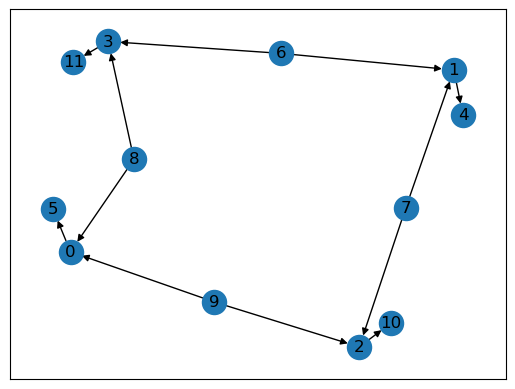

In [2]:
nx.draw_networkx(R[0])

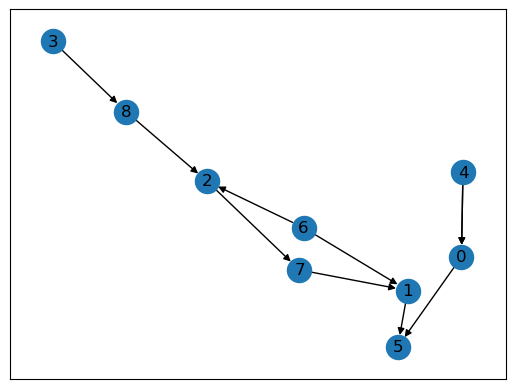

In [3]:
nx.draw_networkx(inet)

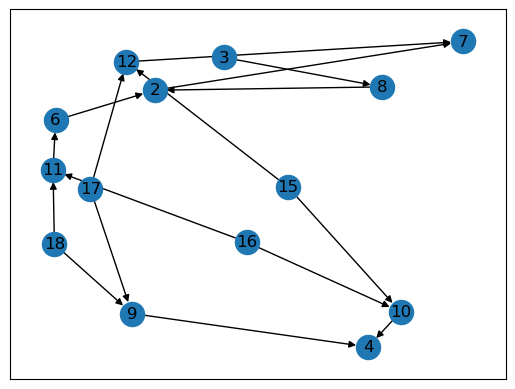

In [4]:
C = dpo_rewrite(inet, L, R, K)
nx.draw_networkx(C)

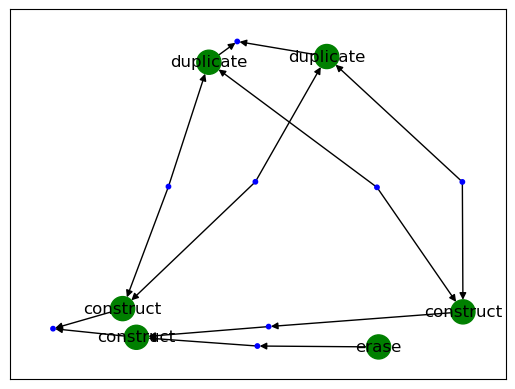

In [9]:
inet_draw(C)

In [6]:
L = inet_concon_rule_L()
R = inet_concon_rule_R()
K = dpo_invariant(C, L, R)
C = dpo_rewrite(C, L, R, K)

AssertionError: 

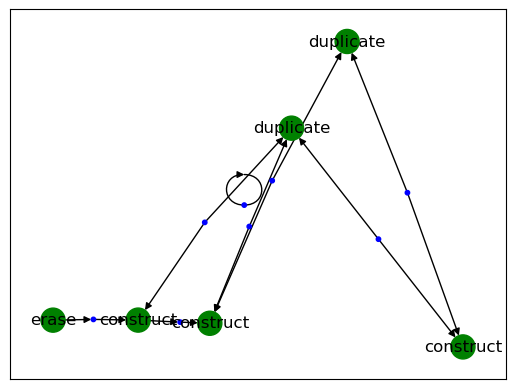

In [ ]:
inet_draw(C)

In [ ]:

L = inet_concon_rule_L()
RB = inet_concon_rule_R()
K = dpo_invariant(L, RB)
G = dpo_rewrite(G, L, RB, K)

TypeError: dpo_invariant() missing 1 required positional argument: 'R'